In [140]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [141]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\creditcard.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [143]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot:xlabel='BALANCE', ylabel='Count'>

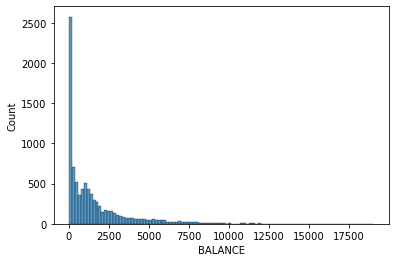

In [144]:
sns.histplot(df['BALANCE'])

<AxesSubplot:xlabel='BALANCE'>

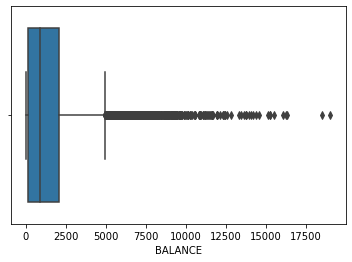

In [145]:
sns.boxplot(df['BALANCE'])

<AxesSubplot:xlabel='BALANCE', ylabel='PURCHASES'>

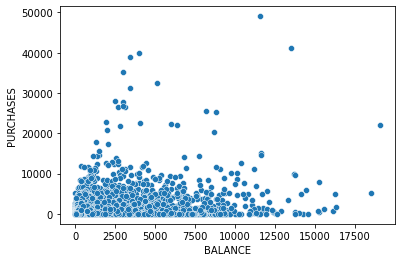

In [146]:
sns.scatterplot(df['BALANCE'], df['PURCHASES'])

<AxesSubplot:xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

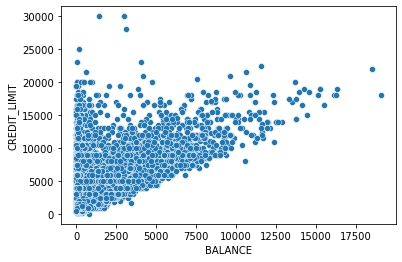

In [147]:
sns.scatterplot(df['BALANCE'], df['CREDIT_LIMIT'])

<AxesSubplot:xlabel='BALANCE', ylabel='CASH_ADVANCE'>

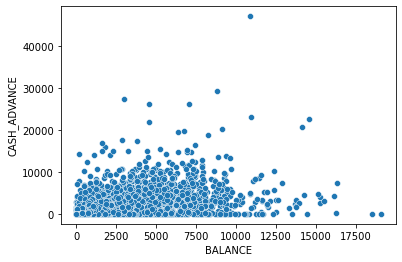

In [148]:
sns.scatterplot(df['BALANCE'], df['CASH_ADVANCE'])

## Data cleaning

In [149]:
df.drop(columns=['CUST_ID'], inplace = True)

In [150]:
simple_impute = SimpleImputer(strategy='median')
df[['MINIMUM_PAYMENTS']] = simple_impute.fit_transform(df[['MINIMUM_PAYMENTS']])

## Scaling

In [151]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [152]:
x_scaled.shape

(8950, 17)

In [170]:
df_scaled = pd.DataFrame(x_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826016,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960380,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960380,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960380,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097795,-0.580536,-0.338305,0.329200,-4.122768


In [171]:
df_scaled.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
dtype: int64

In [156]:
df_scaled.dropna(subset = [12], inplace=True)

In [157]:
df_scaled.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

## PCA

In [158]:
pca = PCA(n_components = 17)
df_pca = pca.fit_transform(df_scaled)

In [159]:
variance = []

for i in range(0, 17):
    variance.append(np.var(df_pca[:, i]))

In [160]:
variance

[4.640323015314728,
 3.453650200584476,
 1.4978933969206356,
 1.271293417616351,
 1.0581578675576968,
 0.9747664332970349,
 0.830025589318991,
 0.7307421604615234,
 0.6457365947085342,
 0.5236438826690629,
 0.40332675023782044,
 0.30150362747408954,
 0.2427559408396158,
 0.20688991534451653,
 0.17217257195813965,
 0.04539916050525706,
 1.1650155422354196e-05]

In [161]:
np.sum(variance[:2])

8.093973215899204

In [162]:
100*np.sum(variance[:2]) / np.sum(variance)

47.61639070906484

In [163]:
f_pca = pd.DataFrame(df_pca)[[1,2]]
f_pca

,1,2
0,-1.072675,0.477951
1,2.508785,0.603508
2,-0.383603,0.094317
3,0.004456,1.501915
4,-0.684279,0.351238
...,...,...
8944,-2.013154,-0.984721
8945,-1.675419,-1.230964
8946,-1.807802,-0.467179
8947,-0.653567,0.975227


## Silhouette

In [164]:
kmeans = KMeans()
kmeans.fit(f_pca)

label = kmeans.labels_

score = []
number_of_clusters = range(2,11)

for i in number_of_clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(f_pca)

    label = kmeans.labels_
    score.append(silhouette_score(f_pca, label, metric = 'euclidean'))

Text(0, 0.5, 'Silhouette Score')

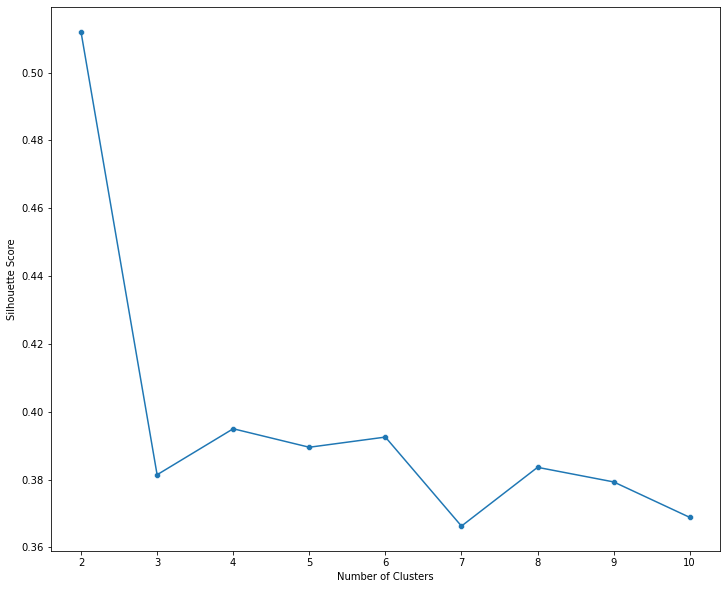

In [165]:
plt.figure(figsize=(12,10))
sns.lineplot(number_of_clusters, score)
sns.scatterplot(number_of_clusters, score)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

## Final Result

In [187]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(f_pca)

KMeans(n_clusters=2)

In [188]:
f_pca['cluster'] = kmeans.labels_
f_pca

,1,2,cluster
0,-1.072675,0.477951,0
1,2.508785,0.603508,1
2,-0.383603,0.094317,0
3,0.004456,1.501915,0
4,-0.684279,0.351238,0
...,...,...,...
8944,-2.013154,-0.984721,0
8945,-1.675419,-1.230964,0
8946,-1.807802,-0.467179,0
8947,-0.653567,0.975227,0


Text(0, 0.5, 'Komponen 2')

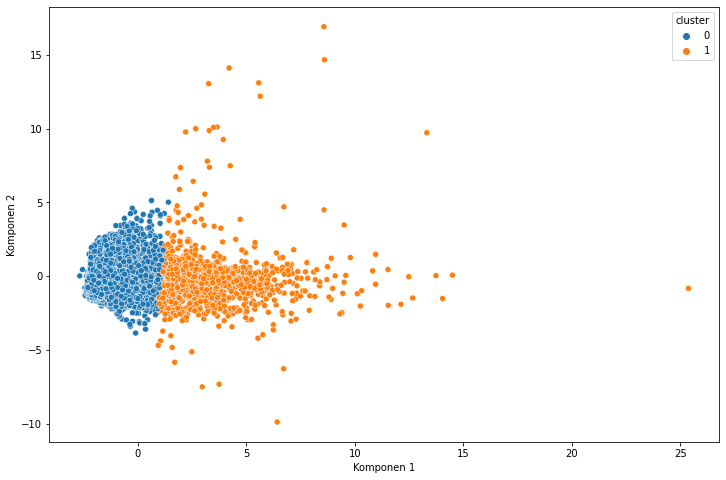

In [190]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data = f_pca,
    x = 1,
    y = 2,
    hue = 'cluster'
)

plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')